# Laboratorio 1


In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import cv2
import ctypes
from IPython.display import display
from skimage import io, measure, morphology
from skimage.color import label2rgb
from skimage.filters import threshold_local, threshold_otsu

## Ejercicio 1

El operador de transformación hot or miss es una herramienta que se utiliza en procesamiento morfológico de imágenes con el fin de poder detectar formas específicas dentro de una imagen, funciona comparando una imagen con una plantilla dada que se conoce como elemento estructurante, para luego encontrar coincidencias exactas. La operación A x B se construye de diferentes básicas de morfología como lo son la dilatación, erosión, apertura, cierre y diferencia los pasos para construir dicha operación son los siguientes:

1. Dilatación de A con B: Se aplica la operación de dilatación entre la imagen A y el elemento estructurante B, esto lo que hará es que expandirá los objetos en la Imagen A de acuerdo con la forma y el tamaño del elemento B.
2. Erosión de la imagen complementaria de A con el complemento de B: Se toma el complemento de la imagen A y el complemento del elemento estructurante b, luego se aplica la operación de erosión entre ellos, lo cual ayuda a  encontrar las ubicaciones en las que el fondo en la imagen original coincide exactamente con el complemento del elemento estructurante.
3. Intersección de los resultados de la dilatación y la erosión: Encontramos la intersección de los resultados obtenidos en los pasos 1 y 2. Esto nos dará las ubicaciones donde los objetos dilatados de A coinciden exactamente con B y donde el fondo complementario de A coincide exactamente con el complemento de B.
4. Resultado final: El resultado final de A X B será la imagen que contiene las ubicaciones donde los objetos en A coinciden exactamente con B y donde el fondo complementario de A coincide exactamente con el complemento de B.


## Ejercicio 2

In [2]:
# Función para obtener el tamaño de la pantalla
def get_screen_resolution():
    user32 = ctypes.windll.user32
    return user32.GetSystemMetrics(0), user32.GetSystemMetrics(1)

# Leer la imagen
original = cv2.imread('Images/fingerprint.jpeg', cv2.IMREAD_GRAYSCALE)

# Invertir la imagen
org_invertida = cv2.bitwise_not(original)

# Binarizar la imagen utilizando Otsu's thresholding
_, binary_image = cv2.threshold(org_invertida, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Redimensionar la imagen para mostrarla más pequeña
scale_percent = 50  # Porcentaje de escala
screen_width, screen_height = get_screen_resolution()
width = int(original.shape[1] * scale_percent / 100)
height = int(original.shape[0] * scale_percent / 100)
dim = (width, height)

# escalar imagenes a un valor visible en pantalla
escalado_original = cv2.resize(original, dim, interpolation=cv2.INTER_AREA)
escalado_invertida = cv2.resize(org_invertida, dim, interpolation=cv2.INTER_AREA)
escalado_binarizado = cv2.resize(binary_image, dim, interpolation=cv2.INTER_AREA)

Text(0.5, 1.0, 'Imagen Invertida')

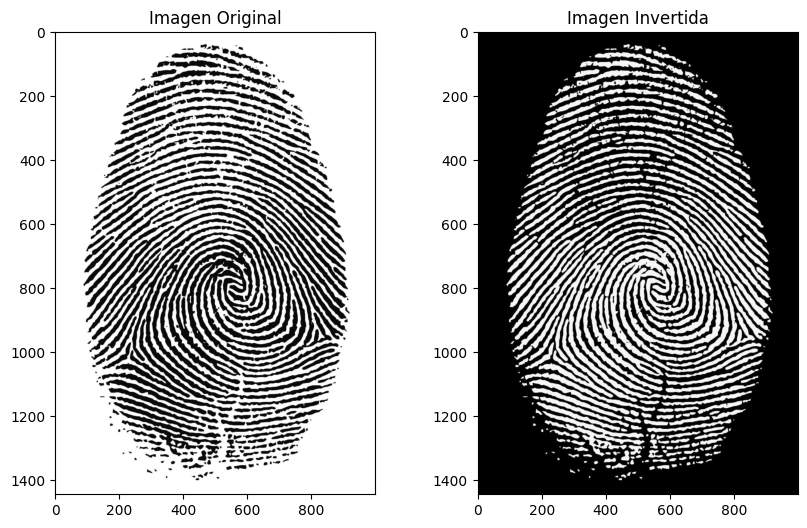

In [3]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(org_invertida, cmap='gray')
plt.title('Imagen Invertida')

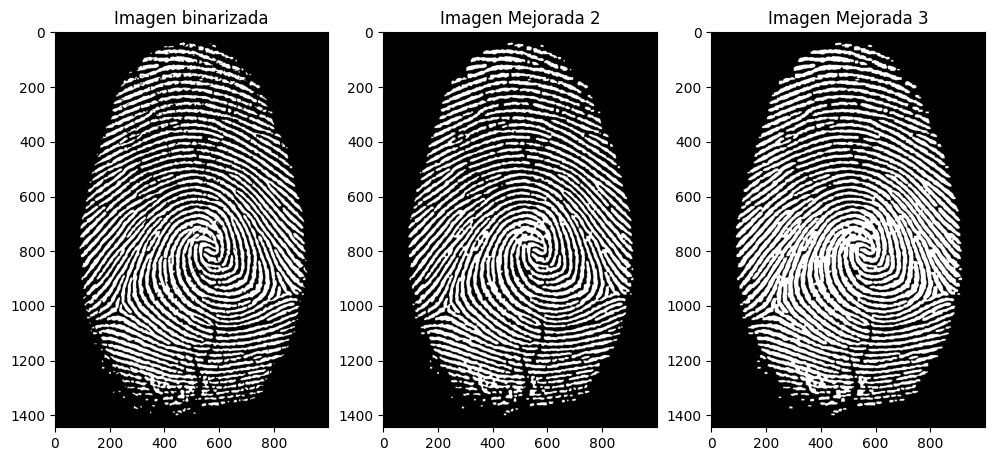

In [4]:
# Aplicar transformaciones morfológicas
kernel1 = np.ones((1,1), np.uint8)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel1)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel1)

kernel2 = np.ones((3,3), np.uint8)
closing2 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)
opening2 = cv2.morphologyEx(closing2, cv2.MORPH_OPEN, kernel2)

kernel3 = np.ones((5,5), np.uint8)
closing3 = cv2.morphologyEx(opening2, cv2.MORPH_CLOSE, kernel3)
opening3 = cv2.morphologyEx(closing3, cv2.MORPH_OPEN, kernel3)

kernel_h = [[0,0,0,0,0,0,0],
            [1,1,0,0,0,1,1],
            [1,1,0,0,0,1,1],
            [1,1,0,0,0,1,1],
            [0,0,0,0,0,0,0]]
kernel_h = np.array(kernel_h, np.uint8)

closing5 = cv2.dilate(opening3, kernel_h)
closing6 = cv2.morphologyEx(closing5, cv2.MORPH_CLOSE, kernel1)
kernel_erosion2 = np.ones((3,3), np.uint8)
erosion2 = cv2.erode(closing6, kernel_erosion2)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen binarizada')

plt.subplot(1, 3, 2)
plt.imshow(opening3, cmap='gray')
plt.title('Imagen Mejorada 2')

plt.subplot(1, 3, 3)
plt.imshow(erosion2, cmap='gray')
plt.title('Imagen Mejorada 3')
plt.show()

## Ejercicio 3

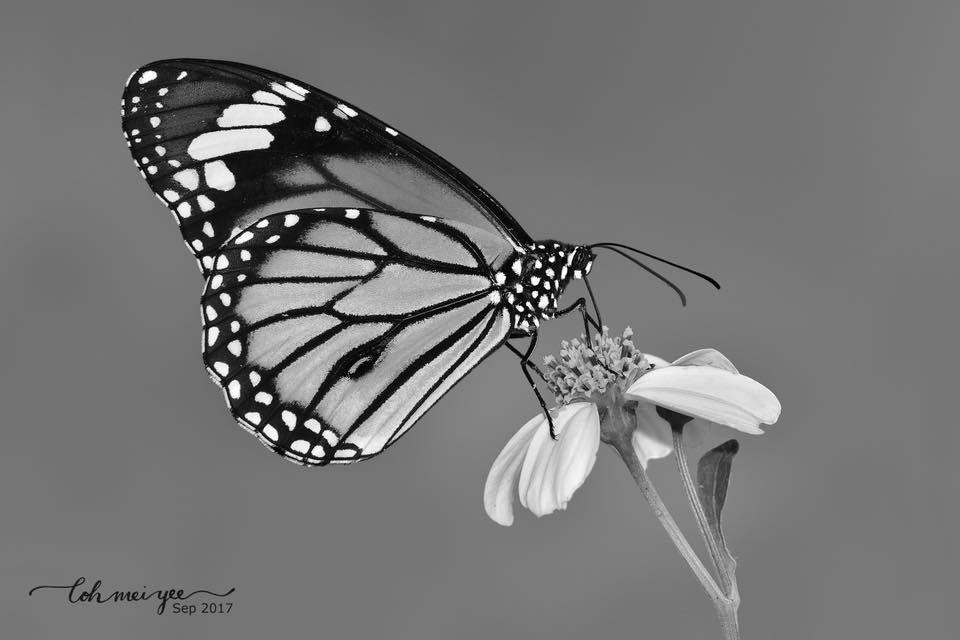

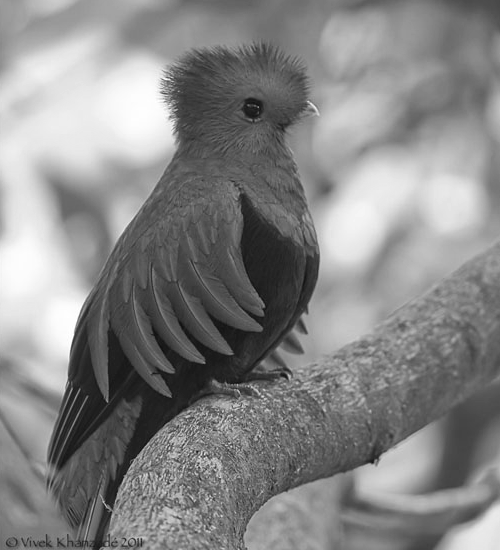

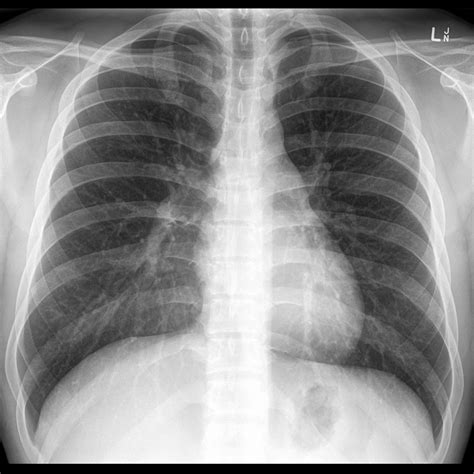

In [5]:
buttlerfly = cv2.imread('Images/butterfly.jpeg')
Quetzal = cv2.imread('Images/quetzalgris.png')
Pecho = cv2.imread('Images/chestxray.jpeg')

buttlerfly = cv2.cvtColor(buttlerfly, cv2.COLOR_BGR2GRAY)
Quetzal = cv2.cvtColor(Quetzal, cv2.COLOR_BGR2GRAY)
Pecho = cv2.cvtColor(Pecho, cv2.COLOR_BGR2GRAY)


display(Image.fromarray(buttlerfly,'L'))
display(Image.fromarray(Quetzal,'L'))
display(Image.fromarray(Pecho,'L'))

In [6]:
kernel = np.ones((5, 5), np.uint8) # Ventana

### Funciones

In [7]:
def dilatacion(imagen, kernel, iterations=1):    	
    imagen_dilatada = cv2.dilate(imagen, kernel, iterations=iterations)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    # Mostrar la primera imagen en el primer subgráfico
    axs[0].imshow(imagen, cmap='gray')
    axs[0].set_title('Imagen Original')

    # Mostrar la segunda imagen en el segundo subgráfico
    axs[1].imshow(imagen_dilatada, cmap='gray')
    axs[1].set_title('Imagen Dilatada')

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [8]:
def erocion(imagen, kernel, iterations=1):    	
    imagen_dilatada = cv2.erode(imagen, kernel, iterations=iterations)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    # Mostrar la primera imagen en el primer subgráfico
    axs[0].imshow(imagen, cmap='gray')
    axs[0].set_title('Imagen Original')

    # Mostrar la segunda imagen en el segundo subgráfico
    axs[1].imshow(imagen_dilatada, cmap='gray')
    axs[1].set_title('Imagen Erosionada')

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [9]:
def Opening(imagen, kernel, iterations=1):
    imagen_opening = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel, iterations=iterations)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    # Mostrar la primera imagen en el primer subgráfico
    axs[0].imshow(imagen, cmap='gray')
    axs[0].set_title('Imagen Original')

    # Mostrar la segunda imagen en el segundo subgráfico
    axs[1].imshow(imagen_opening, cmap='gray')
    axs[1].set_title('Imagen Opening')

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [10]:
def Closing(imagen, kernel, iterations=1):
    imagen_closing = cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    # Mostrar la primera imagen en el primer subgráfico
    axs[0].imshow(imagen, cmap='gray')
    axs[0].set_title('Imagen Original')

    # Mostrar la segunda imagen en el segundo subgráfico
    axs[1].imshow(imagen_closing, cmap='gray')
    axs[1].set_title('Imagen Closing')

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [11]:
def WhiteTopHat(imagen, kernel, iterations=1):
    imagen_opening = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel, iterations=iterations)
    imagen_white_tophat = cv2.subtract(imagen, imagen_opening)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Mostrar la imagen original
    axs[0].imshow(imagen, cmap='gray')
    axs[0].set_title('Imagen Original')

    # Mostrar la imagen después de la apertura
    axs[1].imshow(imagen_opening, cmap='gray')
    axs[1].set_title('Imagen después de Opening')

    # Mostrar la imagen White Top Hat
    axs[2].imshow(imagen_white_tophat, cmap='gray')
    axs[2].set_title('White Top Hat')

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

### Mariposa

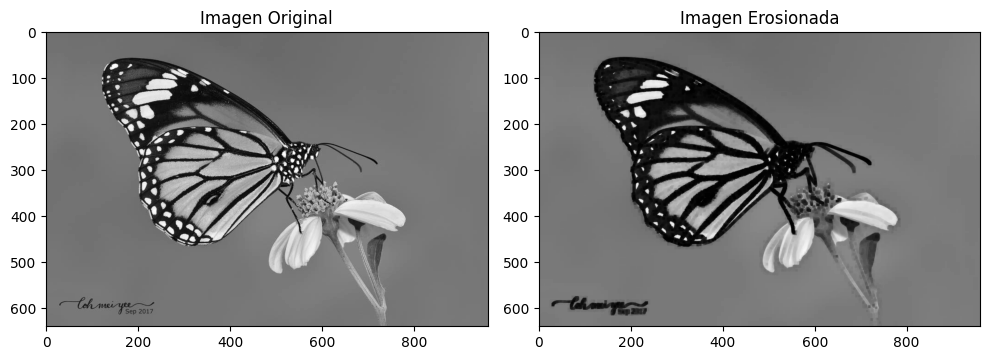

In [12]:
erocion(buttlerfly, kernel, 1)

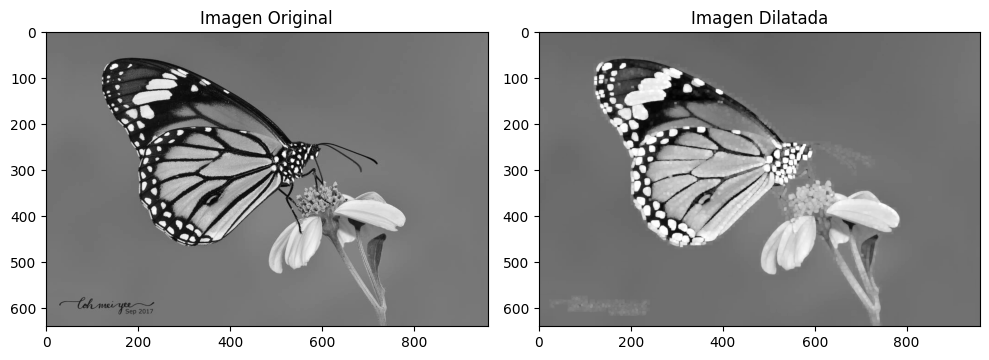

In [13]:
dilatacion(buttlerfly, kernel, 1)

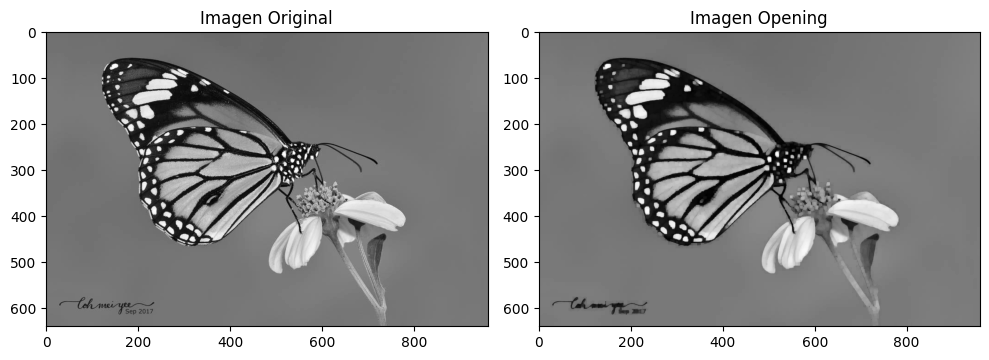

In [14]:
Opening(buttlerfly, kernel, 1)

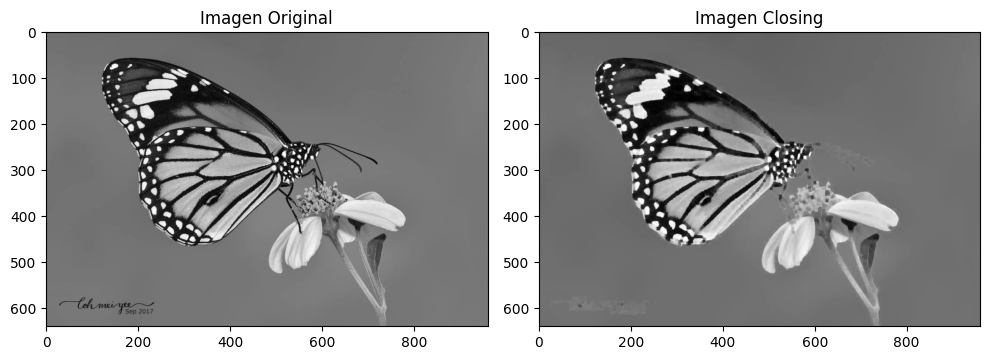

In [15]:
Closing(buttlerfly, kernel, 1)

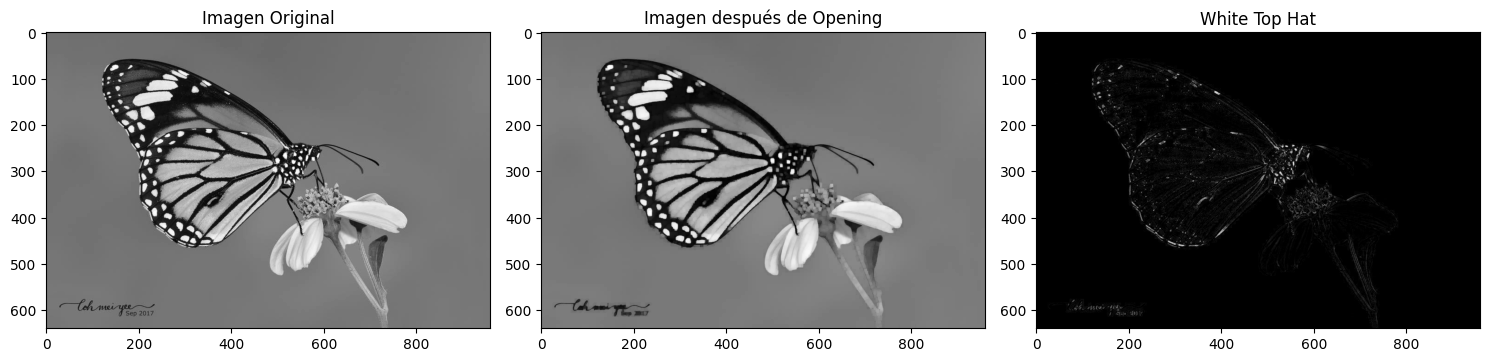

In [16]:
WhiteTopHat(buttlerfly, kernel, 1)

### Quetzal

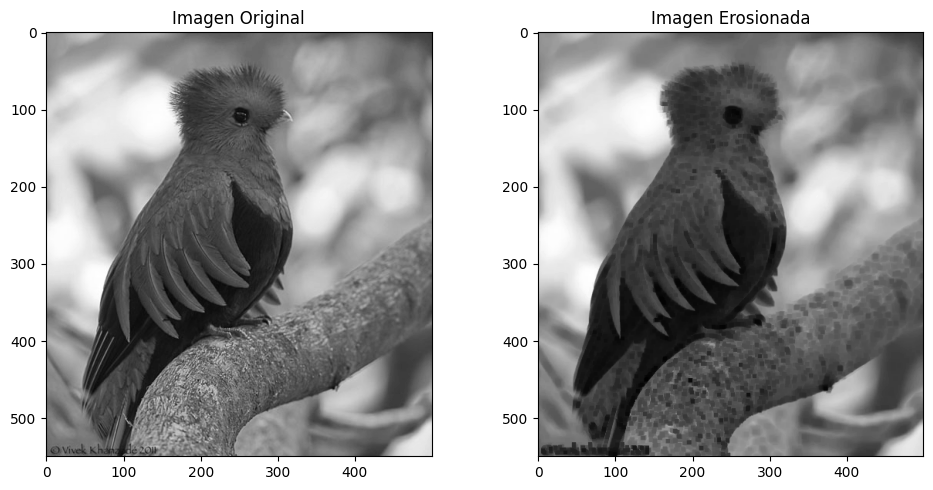

In [17]:
erocion(Quetzal, kernel, 1)

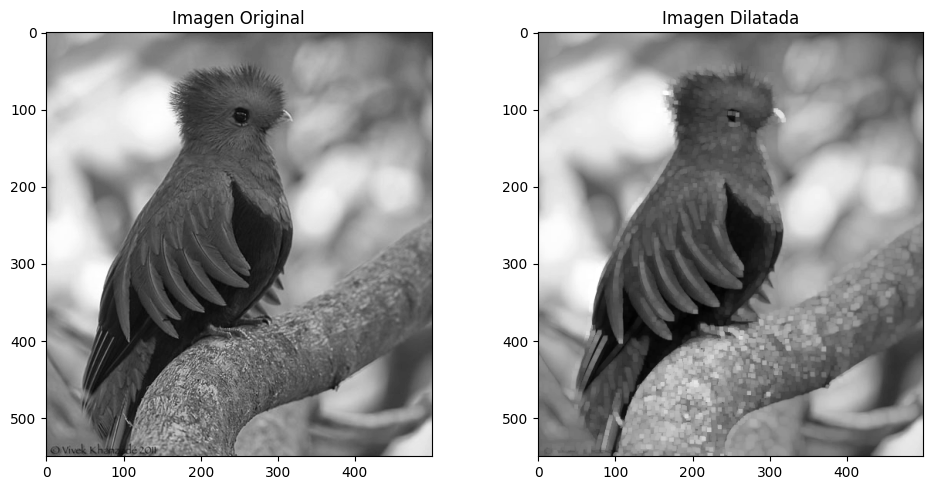

In [18]:
dilatacion(Quetzal, kernel, 1)

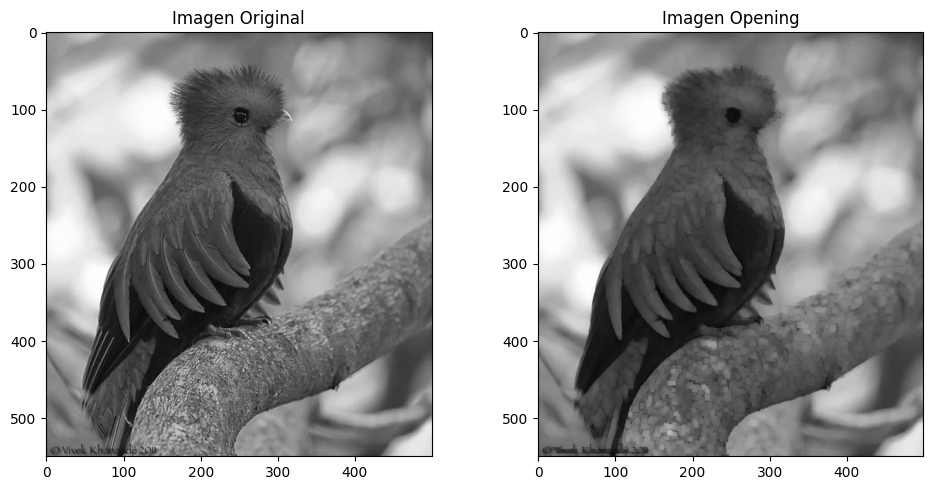

In [19]:
Opening(Quetzal, kernel, 1)

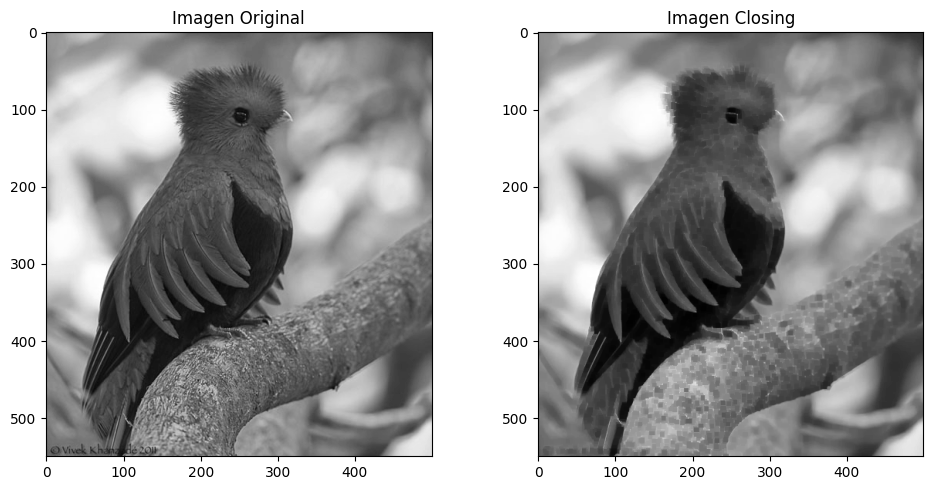

In [20]:
Closing(Quetzal, kernel, 1)

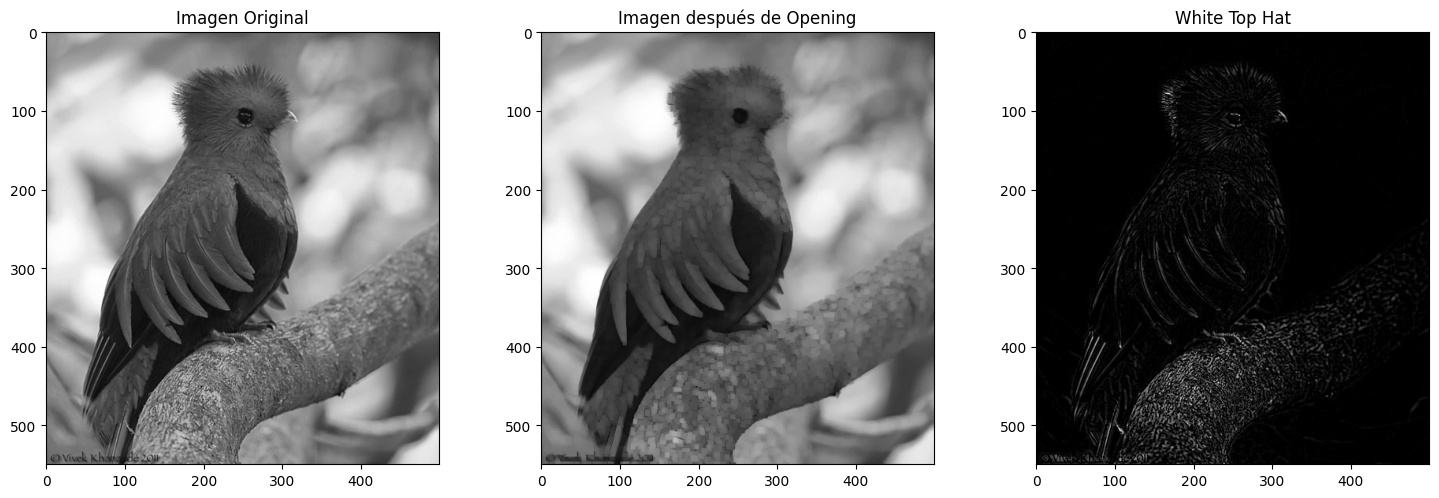

In [21]:
WhiteTopHat(Quetzal, kernel, 1)

### Rayos X

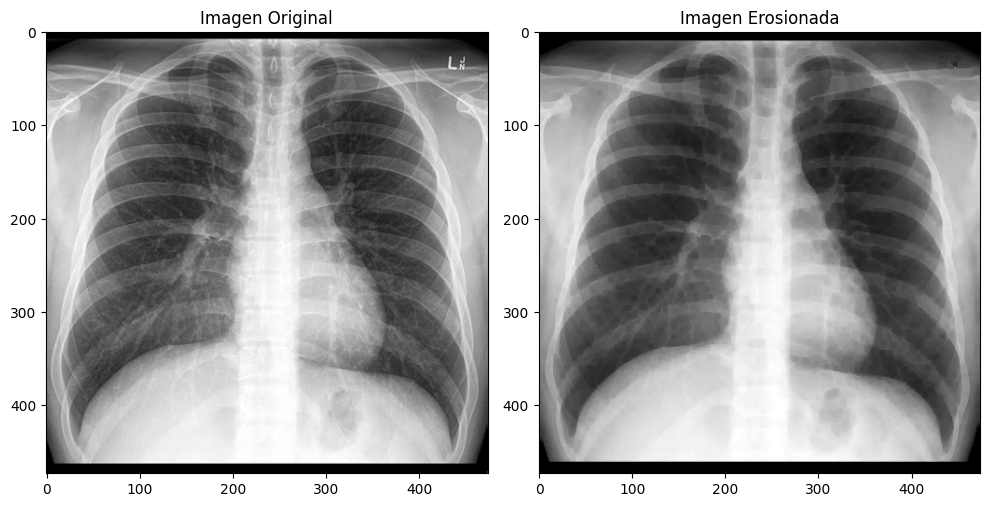

In [22]:
erocion(Pecho, kernel, 1)

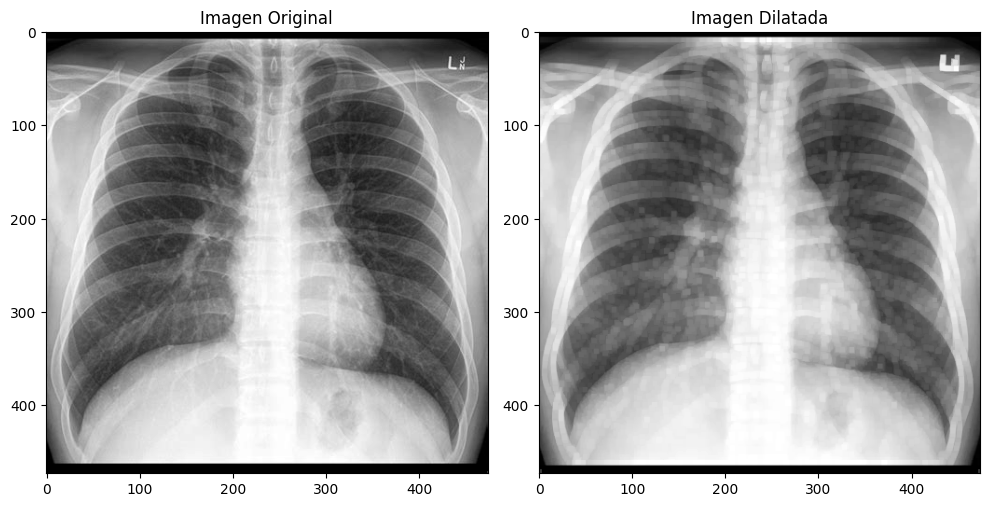

In [23]:
dilatacion(Pecho, kernel, 1)

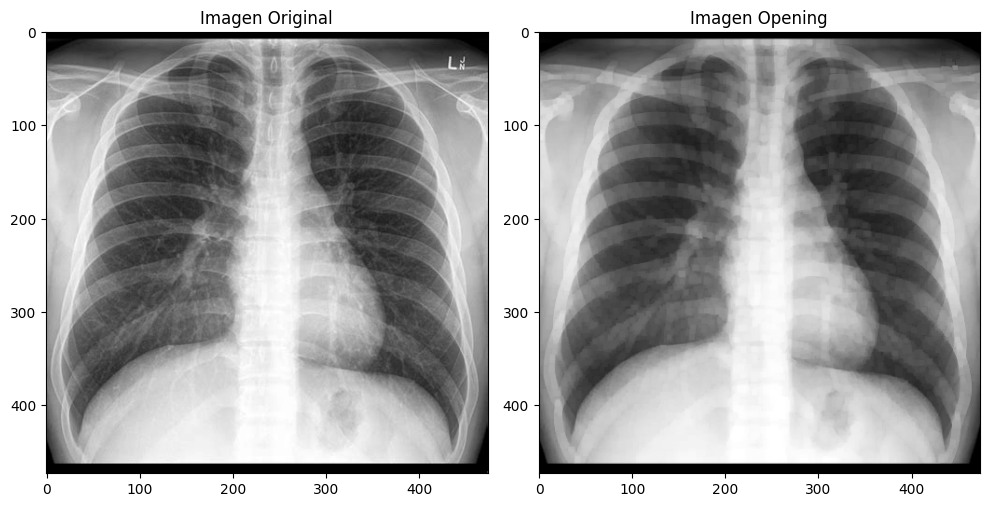

In [24]:
Opening(Pecho, kernel, 1)

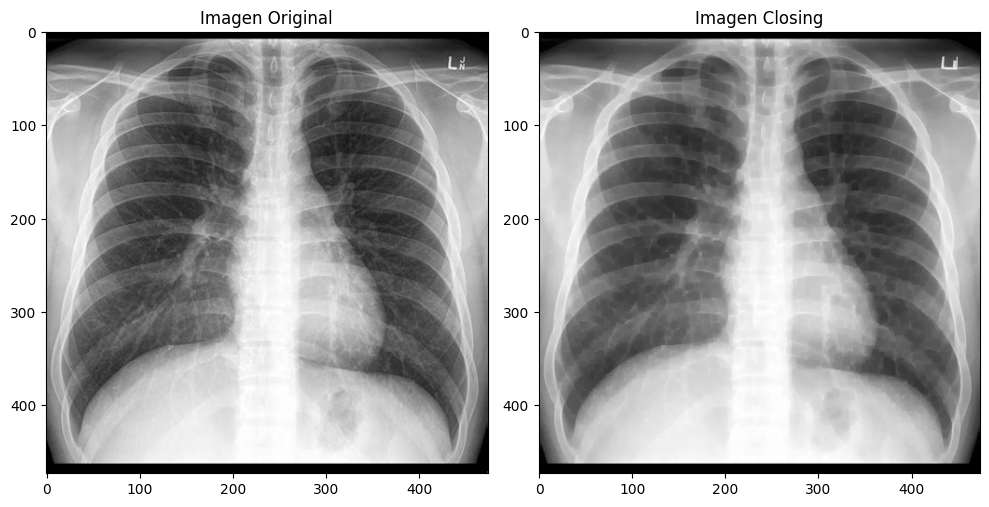

In [25]:
Closing(Pecho, kernel, 1)

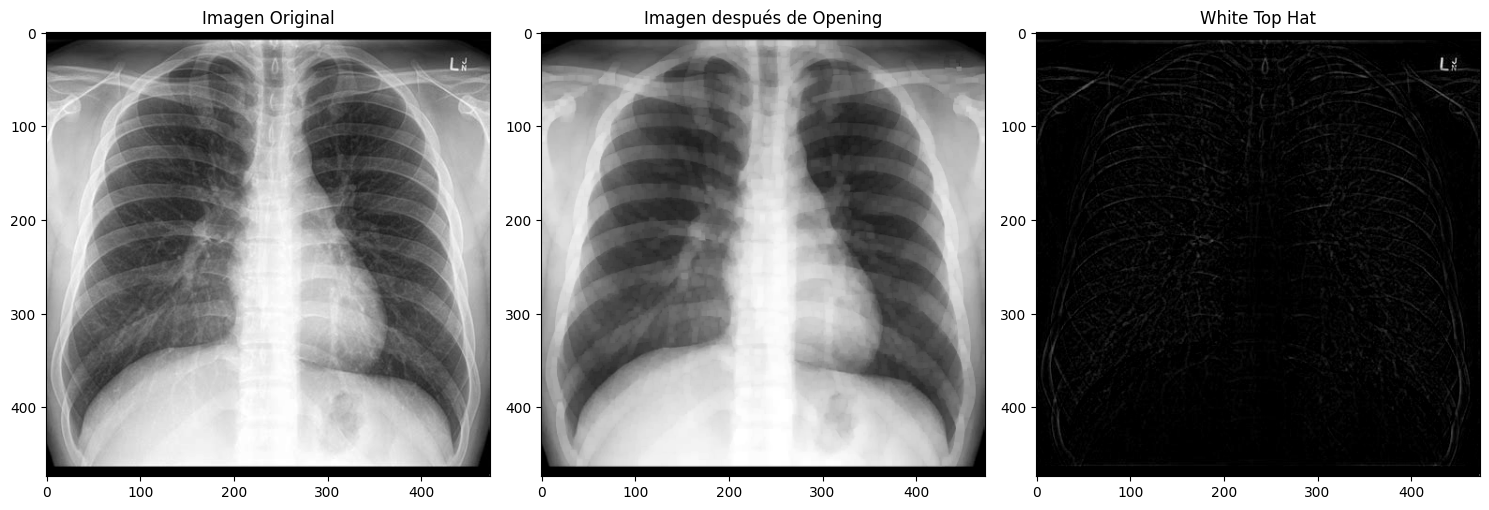

In [26]:
WhiteTopHat(Pecho, kernel, 1)

### Preguntas
• ¿Cuál es el efecto de aplicar dilatación y erosión a estas imágenes?
    En todas las imágenes se puede observar que la dilatación disminuye los detalles de las imágenes, por ejemplo en la mariposa podemos ver que muchos de sus patrones se pierden, el quetzal sus alas y ojos se ven afectados, y en los rayos X se pierden los detalles de las venas y huesos. Por otro lado, la erosión aumenta el grosor de ciertos detalles de las imágenes, en la mariposa se pueden ver más sus atenas y patas, El quetzal su pico y ojos resaltan más, pero en este caso los rayos X las venas se ven como puntos más gruesos y entorpecen un poco la visión de la imagen.

• ¿Cuál es el efecto de aplicar opening y closing a estas imágenes?
    Al aplicar closing a las imágenes se puede observar que se eliminan los detalles de las imágenes, por ejemplo en la mariposa se pierden las antenas, en el quetzal se pierden los detalles del tronco en el que está parado y en los rayos X se pierden los detalles de las venas. Por otro lado, al aplicar opening a las imágenes se pueden observar que se resaltan los detalles de las imágenes, en la mariposa se pueden ver más sus atenas y patas, El querzal su pico y ojos resaltan más y en los rayos X se da un efecto de blur
    
• ¿Qué hace el white top-hat? ¿Para qué puede ser útil?
    White top-hat es una operación que permite ver la silueta de la imagen, es útil para resaltar los detalles de la imagen y para eliminar el ruido de la imagen. En la mariposa quedo el esqueleto de sus alas, para el quetzal quedo todo su cuerpo y para los rayos quedaron las costillas.

## Ejercicio 4

In [27]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

In [28]:
def normalize(image):
    return (image - 0) / (255 - 0)

In [29]:
dogs_image = cv2.imread('Images/dog.webp')
dogs_image_grayscale = dogs_image[:, :, 0]

In [30]:
dogs_image_grayscale.shape

(530, 800)

In [31]:
gaussian_noise = np.random.normal(0, 0.3, dogs_image_grayscale.shape)

In [32]:
dogs_image_grayscale_normalized = normalize(dogs_image_grayscale)
dogs_image_grayscale_noisy = dogs_image_grayscale_normalized + gaussian_noise
dogs_image_grayscale_noisy = np.clip(dogs_image_grayscale_noisy, 0, 1)

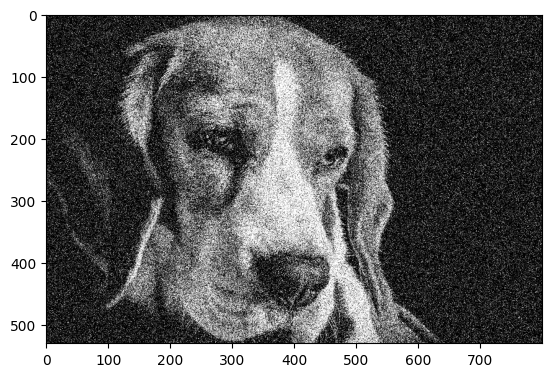

In [33]:
plot_image(dogs_image_grayscale_noisy)

In [34]:
def morphological_smoothing(image, iters=5, k=5, structuring_element=None):
    image = image.copy()
    if not structuring_element:
        structuring_element = morphology.disk(k)
    else:
        if isinstance(k, tuple):
            structuring_element = structuring_element(*k)
        else:
            structuring_element = structuring_element(k)
    for i in range(iters):
        image = morphology.opening(image, structuring_element)
        image = morphology.closing(image, structuring_element)
    return image

In [35]:
diamond = morphology.diamond
rectangle = morphology.rectangle
disk = morphology.disk

### ES de rectángulo

In [36]:
smoothed_image = morphological_smoothing(dogs_image_grayscale_noisy, k=(3, 3), structuring_element=rectangle, iters=2)

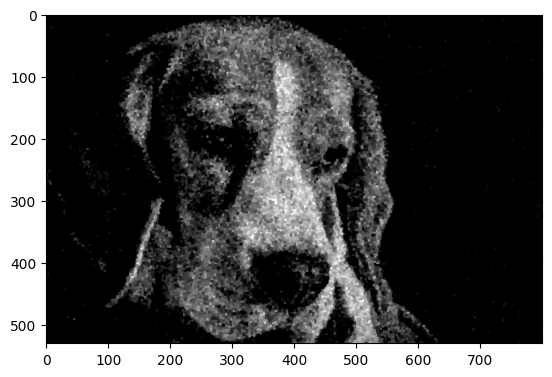

In [37]:
plot_image(smoothed_image)

### ES de diamante

In [38]:
smoothed_image = morphological_smoothing(dogs_image_grayscale_noisy, k=3, structuring_element=diamond, iters=2)

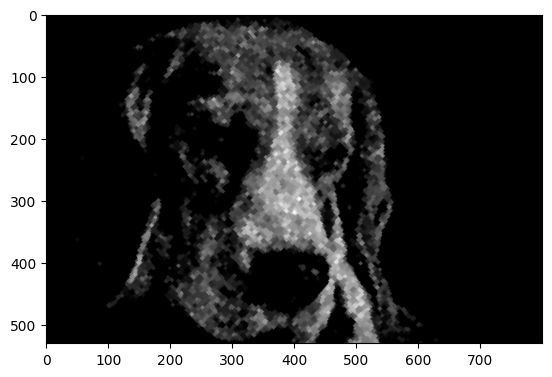

In [39]:
plot_image(smoothed_image)

### ES de disco

In [40]:
smoothed_image = morphological_smoothing(dogs_image_grayscale_noisy, k=3, structuring_element=disk, iters=2)

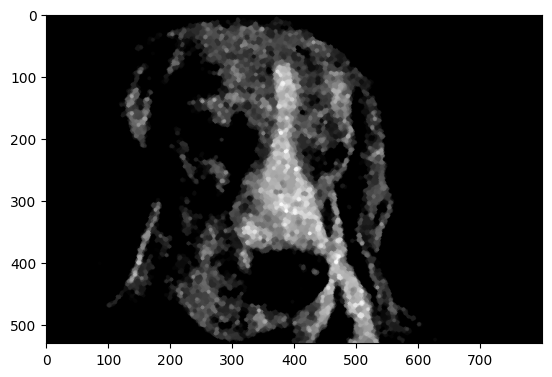

In [41]:
plot_image(smoothed_image)

Se puede observar que todos los elementos estructurantes logran eliminar el ruido en el fondo negro. Sin embargo, tanto el diamante como el disco reducen la calidad de foreground que es el perro, considerablemente. A diferencia de estos, el rectángulo también logra eliminar el ruido y mantiene una calidad aceptable del perro. EL elemento estructurante del rectángulo proporciona mejores resultados, porque es posible que abarque más área y mantenga relativamente bien el foreground. El disco puede suavizar demasiado los detalles de la imagen, mientras que el diamante genera bordes más marcados como se observa.

## Ejercicio 5

In [42]:
brainscan = cv2.imread('Images/brain-scan.jpeg')

In [43]:
brainscan = brainscan[:, :, 0]
brainscan = normalize(brainscan)

In [44]:
def get_gradient(image):
    image = image.copy()
    gradient = morphology.dilation(image) - morphology.erosion(image)
    return gradient

In [45]:
brainscan_gradient = get_gradient(brainscan)

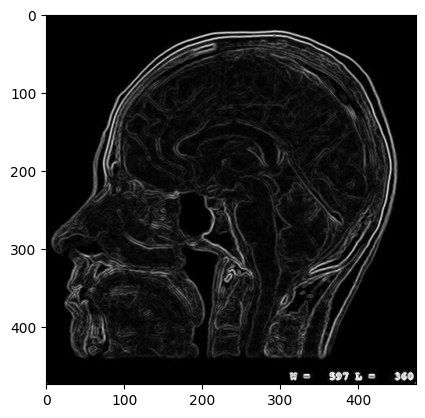

In [46]:
plot_image(brainscan_gradient)

In [47]:
dogs_image_gradient = get_gradient(dogs_image_grayscale_normalized)

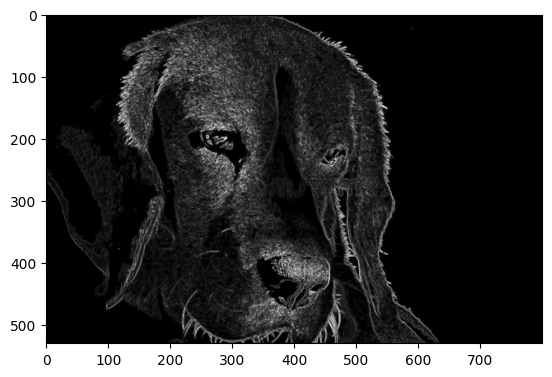

In [48]:
plot_image(dogs_image_gradient)

El gradiente morfológico sirve para resaltar los bordes de las imágenes, como se puede observar en escaneo de cerebro. En este se observar bastante remarcados los bordes del cerebro, de partes de la boca y nariz. Igualmente con el perro, se observan los bordes de la nariz, del hocico y de las orejas. En matemáticas, el gradiente representa un cambio brusco en la magnitud y dirección de una función. Igualmente en las imágenes, el gradiente morfológico identifica los cambios fuertes en el color de los pixeles, identificando los bordes de los objetos.

## Ejercicio 6

### Ejercicio A

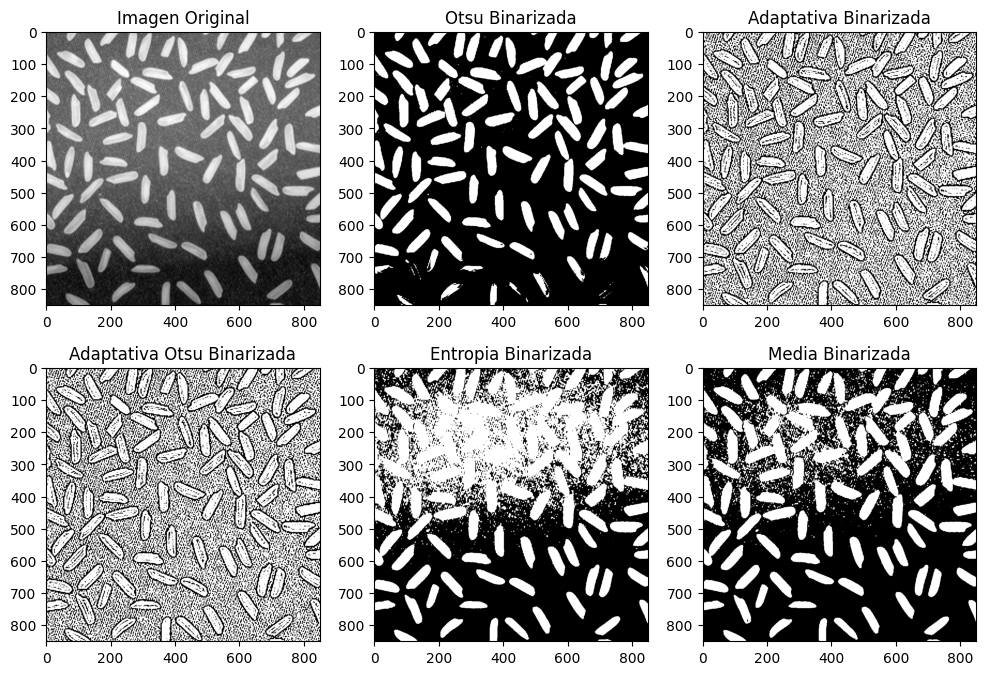

In [49]:
imagen = cv2.imread('./Images/rice.jpg', cv2.IMREAD_GRAYSCALE)
# Binarizar la imagen usando el método de Otsu
_, otsu_binarizada = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Binarizada por metodo adaptativo
adaptativa_binarizada = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# Binarización luego del método adaptativo
_, adaptativa_otsu_binarizada = cv2.threshold(adaptativa_binarizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

def entropy(image):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    hist = hist.ravel() / hist.sum()
    logs = np.log2(hist + np.finfo(float).eps)
    return -1 * (hist * logs).sum()

def entropy_threshold(image):
    max_entropy = -1
    max_threshold = -1
    for t in range(1, 255):
        _, binary = cv2.threshold(image, t, 255, cv2.THRESH_BINARY)
        ent = entropy(binary)
        if ent > max_entropy:
            max_entropy = ent
            max_threshold = t
    return max_threshold

threshold = entropy_threshold(imagen)
_, entropia_binarizada = cv2.threshold(imagen, threshold, 255, cv2.THRESH_BINARY)

# Binarización por método de mediana
_, media_binarizada = cv2.threshold(imagen, np.mean(imagen), 255, cv2.THRESH_BINARY)


plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(otsu_binarizada, cmap='gray')
plt.title('Otsu Binarizada')

plt.subplot(2, 3, 3)
plt.imshow(adaptativa_binarizada, cmap='gray')
plt.title('Adaptativa Binarizada')

plt.subplot(2, 3, 4)
plt.imshow(adaptativa_otsu_binarizada, cmap='gray')
plt.title('Adaptativa Otsu Binarizada')

plt.subplot(2, 3, 5)
plt.imshow(entropia_binarizada, cmap='gray')
plt.title('Entropia Binarizada')

plt.subplot(2, 3, 6)
plt.imshow(media_binarizada, cmap='gray')
plt.title('Media Binarizada')

plt.show()

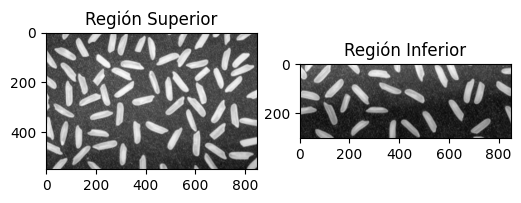

In [50]:
# Definir los límites para las divisiones
limite_superior = 550
limite_inferior = 850

# Dividir la imagen en dos regiones
region_superior = imagen[:limite_superior, :]
region_inferior = imagen[limite_superior:limite_inferior, :]

plt.figure(figsize=(6, 4))
plt.subplot(2, 2, 1)
plt.imshow(region_superior, cmap='gray')
plt.title('Región Superior')

plt.subplot(2, 2, 2)
plt.imshow(region_inferior, cmap='gray')
plt.title('Región Inferior')
plt.show()

Text(0.5, 1.0, 'Binarización Final')

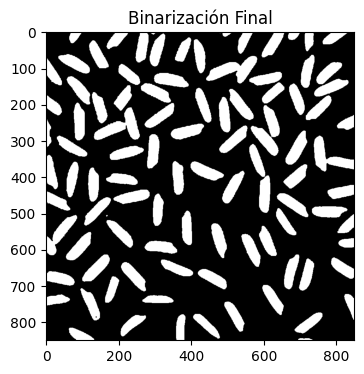

In [51]:
# Combinar las dos imágenes binarizadas
imagen_binarizada_por_partes = cv2.vconcat([otsu_binarizada[:limite_superior, :], media_binarizada[limite_superior:, :]])

# Aplicar transformaciones morfológicas
kernel = np.ones((3,3), np.uint8)
closing_imagen = cv2.morphologyEx(imagen_binarizada_por_partes, cv2.MORPH_CLOSE, kernel)
opening_imagen = cv2.morphologyEx(closing_imagen, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(4, 4))
plt.imshow(opening_imagen, cmap='gray')
plt.title('Binarización Final')

### Ejercicio B

In [52]:
labeled_image = measure.label(opening_imagen)

# Obtener propiedades de las regiones etiquetadas
regions = measure.regionprops(labeled_image)

# Contar los arroces
num_arroces = len(regions)

print("Número total de granos de arroz en la imagen:", num_arroces ,'+/- 4')

Número total de granos de arroz en la imagen: 97 +/- 4


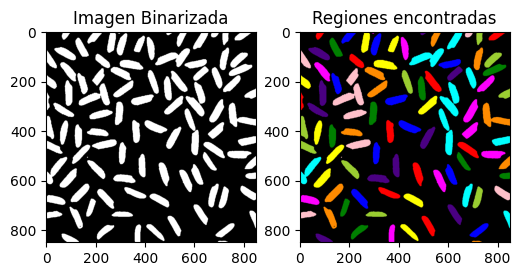

In [53]:
# Convertir la imagen etiquetada a una imagen RGB con colores asignados a las etiquetas
labeled_rgb = label2rgb(labeled_image, bg_label=0)

# Mostrar la imagen con etiquetas
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(opening_imagen, cmap='gray')
plt.title('Imagen Binarizada')

plt.subplot(2, 2, 2)
plt.imshow(labeled_rgb)
plt.title('Regiones encontradas')
plt.show()

## Ejercicio 7

### Ejercicio A

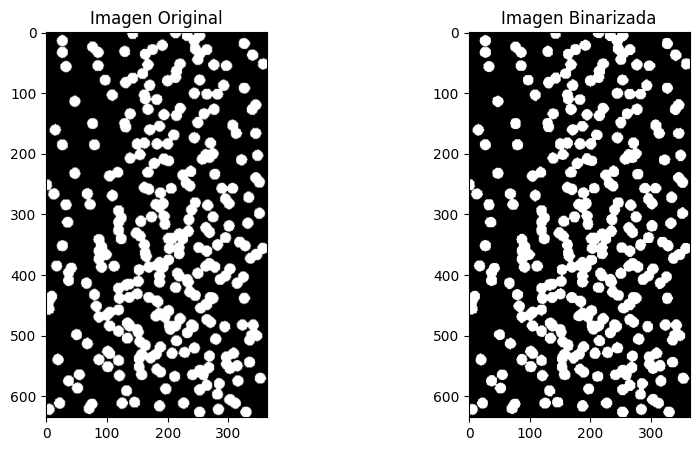

In [54]:
# Cargar la imagen
imagen = cv2.imread('./Images/microscope.png', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen usando el método de Otsu
_, binarizada = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(10, 5))
 
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(binarizada, cmap='gray')
plt.title('Imagen Binarizada')

plt.show()

### Ejercicio B

In [55]:
labeled_image = measure.label(binarizada)

# Obtener propiedades de las regiones etiquetadas
regions = measure.regionprops(labeled_image)

# Encontrar la región de menor tamaño
smallest_region = min(regions, key=lambda x: x.area)

# Obtener el tamaño de la región de menor tamaño
smallest_region_size = smallest_region.area

print("El tamaño de la componente conexa de menor tamaño es:", smallest_region_size, "píxeles.")

El tamaño de la componente conexa de menor tamaño es: 158.0 píxeles.


### Ejercicio C

In [56]:
# Econtrar la region con meayor tamaño
largest_region = max(regions, key=lambda x: x.area)
print("El tamaño de la componente conexa de mayor tamaño es:", largest_region.area, "píxeles.")

# Obtener la etiqueta de la región de mayor tamaño
largest_label = largest_region.label

# Crear una imagen binaria con solo la región de mayor tamaño
binary_image = labeled_image == largest_label

# Guardar la imagen binaria resultante
io.imsave('./Images/largest_component.png', binary_image.astype(np.uint8) * 255)
# Contar el número de células


El tamaño de la componente conexa de mayor tamaño es: 4179.0 píxeles.


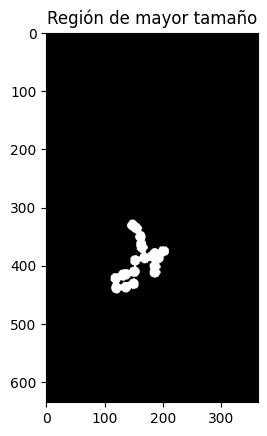

In [57]:
plt.imshow(binary_image, cmap='gray')
plt.title('Región de mayor tamaño')
plt.show()

In [58]:
#Operaciones morfologicas
binarizada = morphology.binary_closing(binarizada, morphology.disk(2))
binarizada = morphology.binary_opening(binarizada, morphology.disk(2))

labeled_image = measure.label(binarizada)

# Obtener propiedades de las regiones etiquetadas
regions = measure.regionprops(labeled_image)

# Contar el número de células
num_cells_detected = len(regions)

print("Número total de células detectadas en la imagen:", num_cells_detected)

Número total de células detectadas en la imagen: 95


## Ejercicio 8

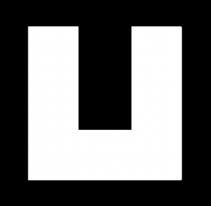

In [59]:

# Leer la imagen
Herradura = cv2.imread('Images/Herradura.jpg')

# Convertir a escala de grises
Herradura_gris = cv2.cvtColor(Herradura, cv2.COLOR_BGR2GRAY)
# Mostrar la imagen en escala de grises
display(Image.fromarray(Herradura_gris, 'L'))


## Ejercicio A

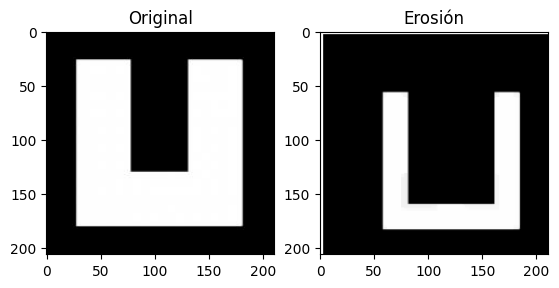

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
Herradura = cv2.imread('Images/Herradura.jpg')

# Convertir a escala de grises
Herradura_gris = cv2.cvtColor(Herradura, cv2.COLOR_BGR2GRAY)


# Aplicar erosión


kernel = np.ones((20, 20), np.uint8)
kernel[:, 10:20] = 0
kernel[10:20, :] = 0

Herradura_erosion = cv2.erode(Herradura_gris, kernel, iterations=3)



# Visualizar las imágenes con matplotlib
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(Herradura, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Imagen después de la erosión
plt.subplot(1, 3, 2)
plt.imshow(Herradura_erosion, cmap='gray')
plt.title('Erosión')

plt.show()


In [61]:
kernel = (kernel * 255).astype(np.uint8)
display(Image.fromarray(kernel, 'L'))

El elemento estrucurante es un cuadrado de 20x20 en el que solo 5x5 están rellenos en la esquina superior izquierda (ver arriba) Y se aplico 3 veces la operación morfológica de erosión.

## Ejercicio B

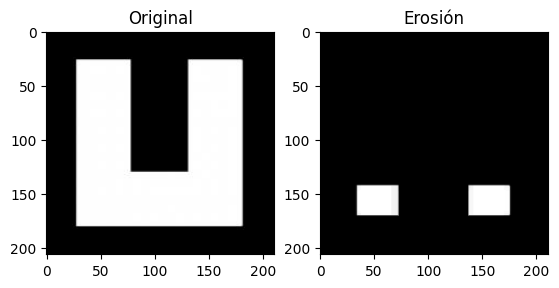

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
Herradura = cv2.imread('Images/Herradura.jpg')

# Convertir a escala de grises
Herradura_gris = cv2.cvtColor(Herradura, cv2.COLOR_BGR2GRAY)


# Aplicar erosión

kernel = np.ones((22, 3), np.uint8)
Herradura_erosion = cv2.erode(Herradura_gris, kernel, iterations=6)

traslacion_matriz = np.float32([[1, 0, 0], [0, 1, 50]])
alto, ancho = Herradura_gris.shape[:2]
# Aplica la traslación a la imagen usando cv2.warpAffine
Herradura_erosion = cv2.warpAffine(Herradura_erosion, traslacion_matriz, (ancho, alto))



# Visualizar las imágenes con matplotlib
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(Herradura, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Imagen después de la erosión
plt.subplot(1, 3, 2)
plt.imshow(Herradura_erosion, cmap='gray')
plt.title('Erosión')

plt.show()


In [63]:
kernel = (kernel * 255).astype(np.uint8)
display(Image.fromarray(kernel, 'L'))

Para obtener este resultado fue necesario utilizar un elemento estructurante de 22x3 y aplicar la operación de erosión 6 veces. Y por ultimo realizar una traslación de 20 pixeles hacia abajo.

## Ejercicio C

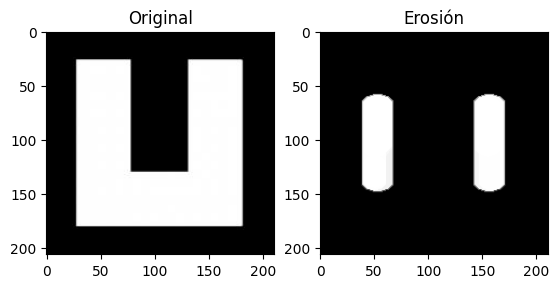

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
Herradura = cv2.imread('Images/Herradura.jpg')

# Convertir a escala de grises
Herradura_gris = cv2.cvtColor(Herradura, cv2.COLOR_BGR2GRAY)


# Aplicar erosión
kernel = [[0,0,0,1,0,0,0],
          [0,0,1,1,1,0,0],
          [0,1,1,1,1,1,0],
          [1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1],
          [0,1,1,1,1,1,0],
          [0,0,1,1,1,0,0],
          [0,0,0,1,0,0,0]]

kernel = np.array(kernel, np.uint8)
#Convertir a numpy array
Herradura_erosion = cv2.erode(Herradura_gris, kernel, iterations=7)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
Herradura_erosion = cv2.dilate(Herradura_erosion, kernel, iterations=2)







# Visualizar las imágenes con matplotlib
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(Herradura, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Imagen después de la erosión
plt.subplot(1, 3, 2)
plt.imshow(Herradura_erosion, cmap='gray')
plt.title('Erosión')

plt.show()


In [65]:
kernel = (kernel * 255).astype(np.uint8)
display(Image.fromarray(kernel, 'L'))

Para esta figura fue necesario utilizar 2 operaciones morfológicas, la primera fue una dilatación con un elemento estructurante disco alargado en el eje y y la segunda fue una erosión con un elemento estructurante de circular 11x11.

## Ejercicio D

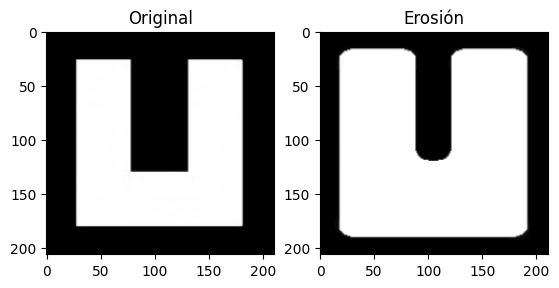

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
Herradura = cv2.imread('Images/Herradura.jpg')

# Convertir a escala de grises
Herradura_gris = cv2.cvtColor(Herradura, cv2.COLOR_BGR2GRAY)


# Aplicar erosión

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
#kernel = np.ones((20, 20), np.uint8)
Herradura_erosion = cv2.dilate(Herradura_gris, kernel, iterations=2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25))

Herradura_erosion = cv2.morphologyEx(Herradura_erosion, cv2.MORPH_CLOSE, kernel)



# Visualizar las imágenes con matplotlib
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(Herradura, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Imagen después de la erosión
plt.subplot(1, 3, 2)
plt.imshow(Herradura_erosion, cmap='gray')
plt.title('Erosión')

plt.show()


In [67]:
kernel = (kernel * 255).astype(np.uint8)
display(Image.fromarray(kernel, 'L'))

Para obtener esta figura fue necesario realizar 2 operaciones morfológicas, la primera fue una dilatación con un elemento estructurante circular de 11x1 y la segunda fue closing con un elemento estructurante circular de 11x11.